# Deep Learning to predict beauty.

This notebook uses the Chicago Face Database to develop a model to rate a person's face.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Features_face.xlsx")

In [3]:
df.head()

,Target,Race,Gender,Age,Attractive,Nose_Width,Nose_Length,Lip_Thickness,Face_Length,R_Eye_H,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
0,AF-200,A,F,32.571429,4.111111,230.5,250.5,135.5,1071.0,63.5,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,AF-201,A,F,23.666667,3.111111,233.5,235.0,129.0,1110.0,44.0,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,AF-202,A,F,24.448276,3.000000,277.5,268.0,141.5,1245.5,66.5,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,AF-203,A,F,22.758621,3.275862,233.5,240.0,129.5,1083.5,68.0,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,AF-204,A,F,30.137931,3.172414,252.5,257.5,100.0,1179.0,66.0,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783


In [4]:
df.shape

(597, 44)

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

## This function links the pictures of each target to the dataframe with the path

In [6]:
def linkfile(target):
    files = []
    file_count = 0
    path = "/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/%s/" % (target)
    for r, d, f in os.walk(path):
        for file in f: 
            if ('.jpg' in file) or ('.jpeg' in file) or '.png' in file:
                files.append(file)
    return files

In [7]:
df["files"] = df.Target.apply(linkfile)

In [8]:
df[['Target', 'files']].head()

,Target,files
0,AF-200,[CFD-AF-200-228-N.jpg]
1,AF-201,[CFD-AF-201-060-N.jpg]
2,AF-202,[CFD-AF-202-122-N.jpg]
3,AF-203,[CFD-AF-203-077-N.jpg]
4,AF-204,[CFD-AF-204-067-N.jpg]


In [9]:
col = []
target = 'Attractive'
for i, inst in df.iterrows():
    folder = inst.Target
    score = inst[target]
    for file in inst.files:
        tmp = []
        tmp.append(folder)
        tmp.append(file)
        tmp.append(score)
        col.append(tmp)

In [10]:
df2 = pd.DataFrame(col, columns = ["folder", "file", "score"])

In [11]:
df2[['file', 'score']].head()

,file,score
0,CFD-AF-200-228-N.jpg,4.111111
1,CFD-AF-201-060-N.jpg,3.111111
2,CFD-AF-202-122-N.jpg,3.000000
3,CFD-AF-203-077-N.jpg,3.275862
4,CFD-AF-204-067-N.jpg,3.172414


In [12]:
df2.head()

,folder,file,score
0,AF-200,CFD-AF-200-228-N.jpg,4.111111
1,AF-201,CFD-AF-201-060-N.jpg,3.111111
2,AF-202,CFD-AF-202-122-N.jpg,3.000000
3,AF-203,CFD-AF-203-077-N.jpg,3.275862
4,AF-204,CFD-AF-204-067-N.jpg,3.172414


In [13]:
df2['Target']=df2['folder']

In [14]:
df2.head()

,folder,file,score,Target
0,AF-200,CFD-AF-200-228-N.jpg,4.111111,AF-200
1,AF-201,CFD-AF-201-060-N.jpg,3.111111,AF-201
2,AF-202,CFD-AF-202-122-N.jpg,3.000000,AF-202
3,AF-203,CFD-AF-203-077-N.jpg,3.275862,AF-203
4,AF-204,CFD-AF-204-067-N.jpg,3.172414,AF-204


In [15]:
data=pd.merge(df, df2, on='Target')

In [16]:
data.head()

,Target,Race,Gender,Age,Attractive,Nose_Width,Nose_Length,Lip_Thickness,Face_Length,R_Eye_H,...,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR,files,folder,file,score
0,AF-200,A,F,32.571429,4.111111,230.5,250.5,135.5,1071.0,63.5,...,0.130719,0.264706,0.388189,91.5,0.545752,1.921146,[CFD-AF-200-228-N.jpg],AF-200,CFD-AF-200-228-N.jpg,4.111111
1,AF-201,A,F,23.666667,3.111111,233.5,235.0,129.0,1110.0,44.0,...,0.144595,0.300901,0.383784,146.0,0.488288,1.901129,[CFD-AF-201-060-N.jpg],AF-201,CFD-AF-201-060-N.jpg,3.111111
2,AF-202,A,F,24.448276,3.000000,277.5,268.0,141.5,1245.5,66.5,...,0.173424,0.298475,0.397029,58.0,0.481333,1.888249,[CFD-AF-202-122-N.jpg],AF-202,CFD-AF-202-122-N.jpg,3.000000
3,AF-203,A,F,22.758621,3.275862,233.5,240.0,129.5,1083.5,68.0,...,0.169820,0.272266,0.421089,87.5,0.500231,1.863719,[CFD-AF-203-077-N.jpg],AF-203,CFD-AF-203-077-N.jpg,3.275862
4,AF-204,A,F,30.137931,3.172414,252.5,257.5,100.0,1179.0,66.0,...,0.180237,0.293893,0.371925,73.5,0.513571,1.935783,[CFD-AF-204-067-N.jpg],AF-204,CFD-AF-204-067-N.jpg,3.172414


In [17]:
data['file'] = "/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/"+data["folder"]+"/"+data['file']

In [18]:
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing import image
def retrievePixels(path):
    img = image.load_img(path, grayscale=False, target_size=(224, 224))
    x = image.img_to_array(img).reshape(1, -1)[0]
    return x


Using TensorFlow backend.


In [19]:
data['file']

0       /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
1       /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
2       /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
3       /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
4       /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
                              ...                        
1202    /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
1203    /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
1204    /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
1205    /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
1206    /Users/rajan_alokkan/Desktop/CFD_Version_203/C...
Name: file, Length: 1207, dtype: object

In [20]:
data['pixels'] = data['file'].progress_apply(retrievePixels)

100%|██████████| 1207/1207 [01:16<00:00, 15.82it/s]


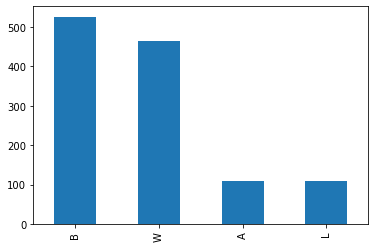

In [21]:
data['Race'].value_counts().plot(kind='bar')
plt.show()

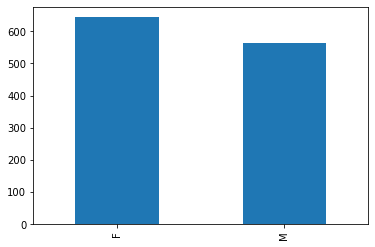

In [22]:
data['Gender'].value_counts().plot(kind='bar')
plt.show()

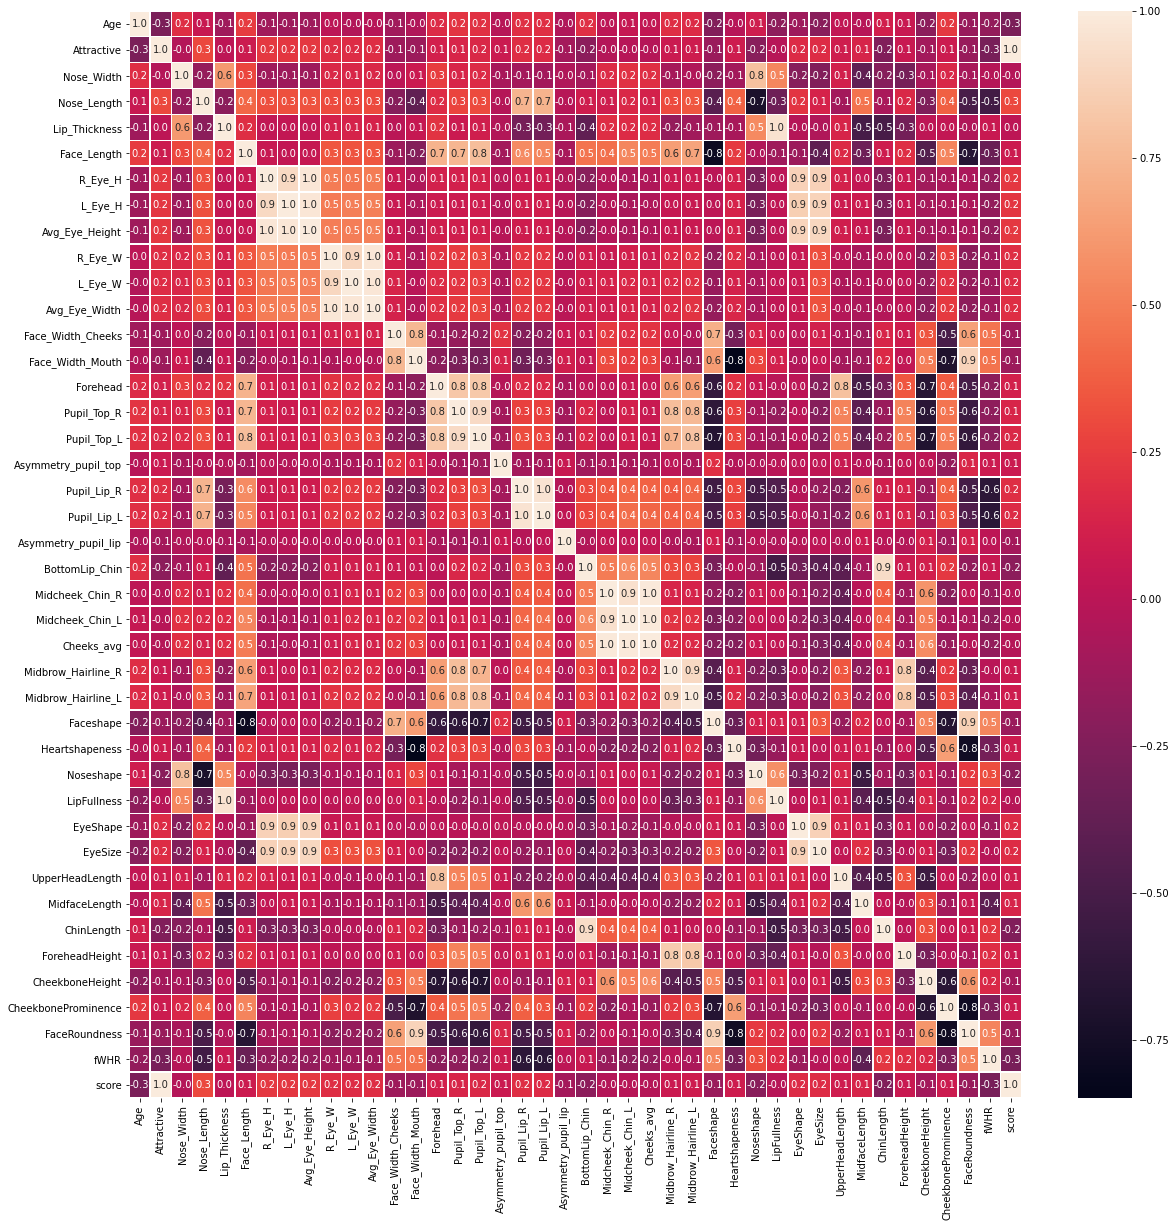

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

## 'R_Eye_H','L_Eye_H','R_Eye_W','L_Eye_W','Pupil_Top_R','Pupil_Top_L', 'Midcheek_Chin_R','Midbrow_Hairline_R','EyeSize','Face_Width_Mouth','BottomLip_Chin','Faceshape', 'Pupil_Lip_R','Midcheek_Chin_L','Lip_Thickness' are highly correlated so let's remove them

In [24]:
col_drop=['R_Eye_H','L_Eye_H','R_Eye_W','L_Eye_W','Pupil_Top_R','Pupil_Top_L',
          'Midcheek_Chin_R','Midbrow_Hairline_R','EyeSize','Face_Width_Mouth','BottomLip_Chin','Faceshape',
          'Pupil_Lip_R','Midcheek_Chin_L','Lip_Thickness']

In [25]:
data=data.drop(col_drop,axis=1)

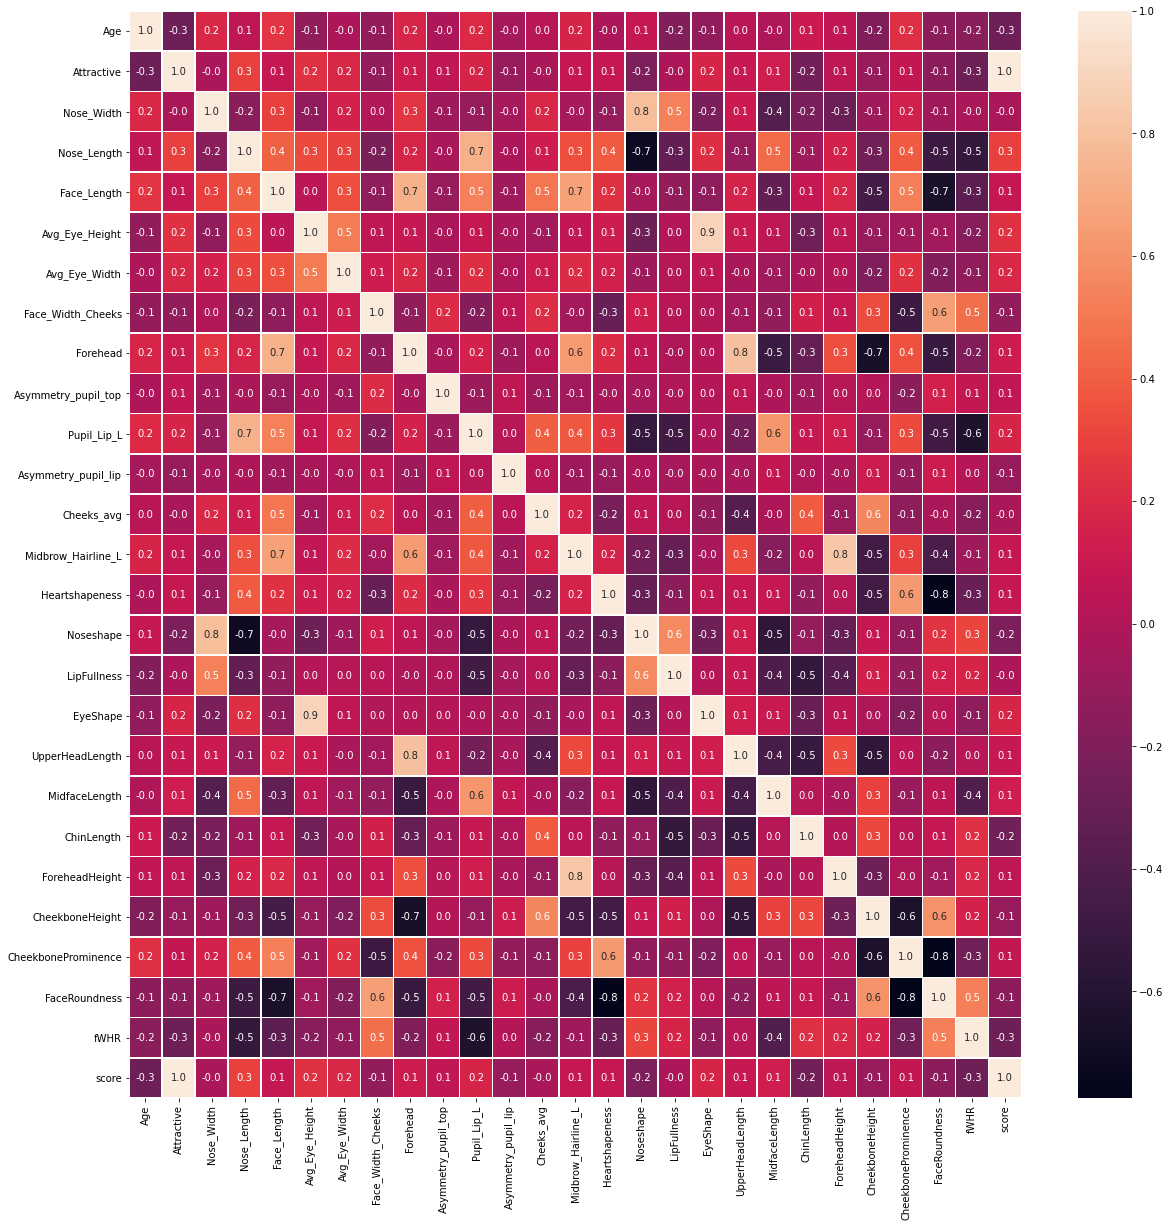

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

## Top 3 most attractive faces

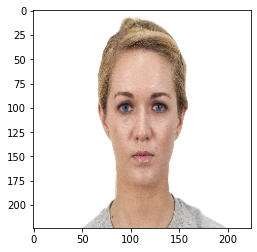

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/WF-233/CFD-WF-233-112-N.jpg
Attractiveness score:  5.47826087


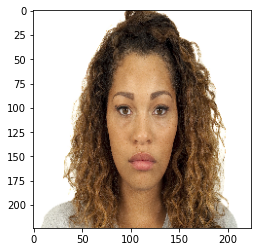

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/BF-240/CFD-BF-240-179-N.jpg
Attractiveness score:  5.310344828


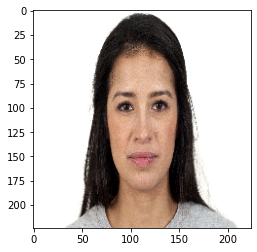

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/LF-249/CFD-LF-249-132-N.jpg
Attractiveness score:  5.24137931


In [27]:
for i,pic in data.sort_values(by=['score'], ascending = False).head(3).iterrows():
    img = pic.pixels
    img = img.reshape(224, 224, 3)
    img = img / 255
    
    plt.imshow(img)
    plt.show()
    print(pic.file)
    print("Attractiveness score: ",pic.score)

## Faces that have scored the least

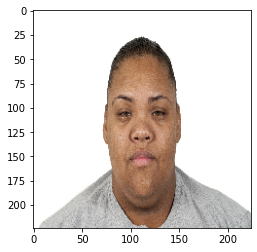

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/BF-200/CFD-BF-200-080-N.jpg
Attractiveness score:  1.551724138


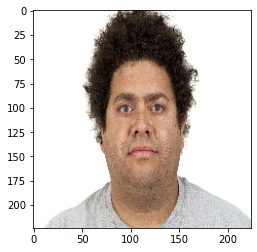

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/LM-240/CFD-LM-240-013-N.jpg
Attractiveness score:  1.541666667


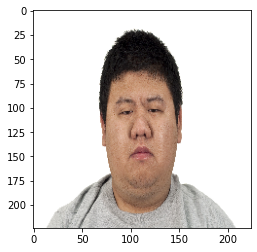

/Users/rajan_alokkan/Desktop/CFD_Version_203/CFD_203_Images/AM-224/CFD-AM-224-126-N.jpg
Attractiveness score:  1.52


In [28]:
for i,pic in data.sort_values(by=['score'], ascending = False).tail(3).iterrows():
    img = pic.pixels
    img = img.reshape(224, 224, 3)
    img = img / 255
    
    plt.imshow(img)
    plt.show()
    print(pic.file)
    print("Attractiveness score: ",pic.score)

In [29]:
features = []
pixels = data['pixels'].values
pixels

array([array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
       array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
       array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
       ...,
       array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
       array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
       array([255., 255., 255., ..., 197., 197., 197.], dtype=float32)],
      dtype=object)

In [30]:
for i in range(0, pixels.shape[0]):
    features.append(pixels[i])

In [31]:
features = np.array(features)
features = features.reshape(features.shape[0], 224, 224, 3)
features = features / 255

In [32]:
features.shape

(1207, 224, 224, 3)

## Training and testing data split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, data.score.values, test_size=0.3, random_state=21)
print("train set: ", x_train.shape[0])
print("validation set: ", x_test.shape[0])

train set:  844
validation set:  363


In [34]:
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Input, Convolution2D,ZeroPadding2D, MaxPooling2D, Activation

## Creating a Convolutional Neural Network

In [35]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

## Adopting transfer learning

### VGG dataset
So, this is used as the basis for development of Convolutional Neural Networks for tasks like identification and verification of facial features. The model is trained on a large dataset, and is evaluated on other benchmark datasets.
The output layer is a softmax activation function because it maps the output in the range of [0,1] and also ensures probability distribution. The layer is removed later and the output becomes a vector feature which represents the face and is called a face embedding. Fine-tuning is done on the model such that the straight line distance or known as Euclidean distance is smaller for the same identity and for different ones it becomes larger which is by the use of a function called triplet loss function.

https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing the pre-trained weights have been downloaded from here

In [36]:
model.load_weights('vgg_face_weights.h5')

All layers of VGG-Face dataset have been freezed except last 7 

In [37]:
classes=1
for layer in model.layers[:-7]:
    layer.trainable = False

model_output = Sequential()
model_output = Flatten()(model.layers[-4].output)
model_output = Dense(classes)(model_output)
attractiveness_model = Model(inputs=model.input, outputs=model_output)

In [38]:
attractiveness_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())

In [39]:
score = attractiveness_model.fit(
    x_train, y_train,
    epochs=1,
    validation_data=(x_test, y_test)
)

27/27 [==============================] - 667s 25s/step - loss: 3.3492 - val_loss: 0.4679


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [41]:
predictions = attractiveness_model.predict(x_test)
actuals = y_test

In [42]:
perf = pd.DataFrame(actuals, columns = ["actuals"])
perf["predictions"] = predictions

In [43]:
print("mae: ", mean_absolute_error(actuals, predictions))
print("rmse: ", sqrt(mean_squared_error(actuals, predictions)))

mae:  0.521582183022233
rmse:  0.6840078363642841


Nose_Width	Distance between outer edges of nostrils at widest point.


Nose_Length	Distance between Forehead Bridge at level of visible upper eye edge to nose tip. For the Nose Tip, imagine a spot where the nose protrudes from the face. Optional Tip: You can make a temporary line across the eyes to get a good visual reference of where the upper eye edge is on the bridge of the nose.	


Face_Length	Distance between hairline and base of chin. Note: For some people, there may be a double chin. You may have to guesstimate. 

			
Avg_Eye_Height	Average distance between upper and lower edge of visible eye within eyelids at center of pupil for right and left eye.			

			
Avg_Eye_Width	Average distance between inner and outer corner of eye for right and left eye.			


Face_Width_Cheeks	Distance between outer edges of cheeks at most prominent points.


Forehead	Distance from center of hairline to the center between the eyes. Tip: You can make a temporary box that goes between the eyes to get a good visual reference on where to start on the bridge of the nose.

		
Asymmetry_pupil_top	Absolute value difference between distance between pupil center to hairline for right and left.			
		
Pupil_Lip_L	Distance between pupil center to top edge of lips.			
Asymmetry_pupil_lip	Absolute value difference between distance between pupil center to top edge of lips for right and left.	


Midcheek_Chin_L	Distance between midcheek and bottom of chin.	


Cheeks_avg	Average distance between midcheek and bottom of chin for right and left.		

 			
Midbrow_Hairline_L	Distance between midbrow to hairline. This should be above the pupil of each eye in the middle of the eye brown. 

Heartshapeness	Face width at cheeks divided by face width at mouth

Noseshape	Nose width divided by nose length		
LipFullness	Lip thickness divided by face length		
EyeShape	Eye height divided by eye width				
UpperHeadLength	Forehead divided by face length		
MidfaceLength	(Average pupil to lip for right and left) divided by face length		
ChinLength	Bottom of lip to chin divided by face length		
ForeheadHeight	(Average midbrow to hairline for right and left) divided by face length		
CheekboneHeight	(Average midcheeck to chin for right and left) divided by face length		
CheekboneProminence	(Face width at cheek minus face width at mouth) divided by face length		
FaceRoundness	Face width at mouth divided by face length		
fWHR	Facial width to height ratio		